In [1026]:
# import used libraries:
import pandas as pd
import numpy as np
import json
import requests
import os
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [1027]:
# access to Twitter API by your authentication
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "HIDDEN"
consumer_secret = "HIDDEN"
access_token = "HIDDEN"
access_secret = "HIDDEN"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

## Gathering Data:

Import the three data files:
* twitter-archive-enhanced.csv
* image-predictions.tsv
* tweet-json.txt

In [1028]:
# import twitter-archive-enhanced.csv using read csv (csv: comma-separated values)
t_ar_en_df = pd.read_csv('twitter-archive-enhanced.csv')

In [1029]:
# display the head of the t_ar_en_df
t_ar_en_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [1030]:
# display the tail of the t_ar_en_df
t_ar_en_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [1031]:
# display the data type of the t_ar_en_df
t_ar_en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1032]:
# import image-predictions.tsv programmatically usings request and the provided url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content)
r.headers['content-type']
r.text

"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/m

In [1033]:
# read image-predictions.tsv using the url (tsv: tab-separated values)
img_df = pd.read_table(url, sep = '\t')

In [1034]:
# display the head of the img_df
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1035]:
# display the tail of the img_df
img_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [1036]:
# display the data type of the columns in img_df
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1037]:
# import tweet-json.txt and convert json to a dataframe
json_df = pd.read_json('tweet-json.txt', lines = True)

In [1038]:
# display the head of the json_df
json_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmo

In [1039]:
# display the tail of the json_df
json_df.tail()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2349,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'url': 'https://t.co/4B7cOc1EDq', 'display_url': 'pic.twitter.com/4B7cOc1EDq', 'expanded_url': 'https://twitter.com/dog_rates/status/666049248165822465/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 600, 'h': 800, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 340, 'h': 453, 'resize': 'fit'}}}]}","{'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'url': 'https://t.co/4B7cOc1EDq', 'display_url': 'pic.twitter.com/4B7cOc1EDq', 'expanded_url': 'https://twitter.com/dog_rates/status/666049248165822465/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 600, 'h': 800, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 340, 'h': 453, 'resize': 'fit'}}}]}",111,False,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,...,0.0,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3201018, 'friends_count': 104, 'listed_count': 2812, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
2350,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666044217047650304, 'id_str': '666044217047650304', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg', 'media_url_https': 'https://pbs.twimg

In [1040]:
# import tweet-json.txt and convert json to a dataframe
df_list = []
with open('tweet-json.txt', 'r') as file:
    for j in file:
        data = json.loads(j)
        
        # append to a list of dictionaries
        df_list.append({'tweet_id': data['id'],
                        'user_name': data['user']['name'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count'],
                        'text': data['full_text'],
                        'location': data['user']['location'],
                        })

# create a dataframe called json_data_df
json_data_df = pd.DataFrame(df_list, columns = ['tweet_id', 'user_name', 'retweet_count', 'favorite_count', 'text', 'location'])

In [1041]:
# display the head of the json_data_df
json_data_df.head()

,tweet_id,user_name,retweet_count,favorite_count,text,location
0,892420643555336193,WeRateDogs™ (author),8853,39467,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,"DM YOUR DOGS, WE WILL RATE"
1,892177421306343426,WeRateDogs™ (author),6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV","DM YOUR DOGS, WE WILL RATE"
2,891815181378084864,WeRateDogs™ (author),4328,25461,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,"DM YOUR DOGS, WE WILL RATE"
3,891689557279858688,WeRateDogs™ (author),8964,42908,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,"DM YOUR DOGS, WE WILL RATE"
4,891327558926688256,WeRateDogs™ (author),9774,41048,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","DM YOUR DOGS, WE WILL RATE"


In [1042]:
# display the tail of the json_data_df
json_data_df.tail()

,tweet_id,user_name,retweet_count,favorite_count,text,location
2349,666049248165822465,WeRateDogs™ (author),41,111,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,"DM YOUR DOGS, WE WILL RATE"
2350,666044226329800704,WeRateDogs™ (author),147,311,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,"DM YOUR DOGS, WE WILL RATE"
2351,666033412701032449,WeRateDogs™ (author),47,128,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,"DM YOUR DOGS, WE WILL RATE"
2352,666029285002620928,WeRateDogs™ (author),48,132,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,"DM YOUR DOGS, WE WILL RATE"
2353,666020888022790149,WeRateDogs™ (author),532,2535,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,"DM YOUR DOGS, WE WILL RATE"


In [1043]:
# display the data type of the columns in json_data_df
json_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id          2354 non-null int64
user_name         2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
text              2354 non-null object
location          2354 non-null object
dtypes: int64(3), object(3)
memory usage: 110.4+ KB


In [1044]:
print(type(data), data.keys())

<class 'dict'> dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


## Assessing Data:

Assess the following in each dataframe:
* t_ar_en_df.sample(20)
* print(t_ar_en_df.loc[[46]])
* sum(img_df.tweet_id.duplicated())
* t_ar_en_df.dtypes
* t_ar_en_df.text[4]
* t_ar_en_df.name.value_counts()
* t_ar_en_df.rating_numerator.value_counts()
* t_ar_en_df.rating_denominator.value_counts()


* img_df.sample(20)
* img_df.dtypes
* sum(img_df.tweet_id.duplicated())
* img_df.value_counts()


* json_data_df.sample(20)
* json_data_df.dtypes
* sum(json_data_df.tweet_id.duplicated())
* json_data_df.value_counts()

In [1045]:
# display a sample of 20 rows from t_ar_en_df
t_ar_en_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1727,679877062409191424,NaN,NaN,2015-12-24 04:11:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Penelope. She's a bacon frise. Total babe (lol get it like the movie). Doesn't bark tho. 5/10 very average dog https://t.co/SDcQYg0HSZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679877062409191424/photo/1,5,10,Penelope,None,None,None,None
125,868622495443632128,NaN,NaN,2017-05-28 00:18:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a h*ckin peaceful boy. Unbothered by the comings and goings. 13/10 please reveal your wise ways https://t.co/yeaH8Ej5eM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868622495443632128/photo/1,13,10,None,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
2052,671486386088865792,NaN,NaN,2015-12-01 00:30:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Malcolm. He just saw a spider. 10/10 https://t.co/ympkwF65Dx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671486386088865792/photo/1,10,10,Malcolm,None,None,None,None
926,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,"https://twitter.com/dog_rates/status/679158373988876288/photo/1,https://twitter.com/dog_rates/status/679158373988876288/photo/1",11,10,Rubio,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/883965650754039809,13,10,None,None,None,None,None
164,860184849394610176,NaN,NaN,2017-05-04 17:30:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Here we have perhaps the wisest dog of all. Above average with light sabers. Immortal as h*ck. 14/10 dog, or dog not, there is no try https://t.co/upRYxG4KbG",NaN,NaN,NaN,https://twitter.com/dog_rates/status/860184849394610176/photo/1,14,10,None,None,None,None,None
1915,674318007229923329,NaN,NaN,2015-12-08 20:01:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lennon. He's in quite the predicament. 8/10 hang in there pupper https://t.co/7mf8XXPAZv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674318007229923329/photo/1,8,10,Lennon,None,None,pupper,None
1326,706153300320784384,NaN,NaN,2016-03-05 16:24:01 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Layla. She's giving you a standing ovation.13/10 just magnificent (vid by @CSBrzezinski) https://t.co/KxYXHUHUi2,NaN,NaN,NaN,https://vine.co/v/iXidJXBJ3P9,13,10,Layla,None,None,None,None
809,771500966810099713,NaN,NaN,2016-09-02 00:12:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dakota. He's just saying hi. That's all. 12/10 someone wave back https://t.co/1tWe5zZoHv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771500966810099713/photo/1,12,10,

In [1046]:
# display row number 46 from t_ar_en_df
print(t_ar_en_df.loc[[46]])

              tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
46  883360690899218434 NaN                    NaN                    

                    timestamp  \
46  2017-07-07 16:22:55 +0000   

                                                                                source  \
46  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                   text  \
46  Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP   

    retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
46 NaN                  NaN                        NaN                         

                                                      expanded_urls  \
46  https://twitter.com/dog_rates/st

In [1047]:
# display tweet_id 855851453814013952 from t_ar_en_df
t_ar_en_df[t_ar_en_df.tweet_id == 855851453814013952]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo


In [1048]:
# display the number of duplicated rows of tweet_id in the t_ar_en_df
sum(t_ar_en_df.tweet_id.duplicated())

0

In [1049]:
# display the data type of the columns in t_ar_en_df
t_ar_en_df.dtypes

tweet_id                      int64  
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                     object 
source                        object 
text                          object 
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp    object 
expanded_urls                 object 
rating_numerator              int64  
rating_denominator            int64  
name                          object 
doggo                         object 
floofer                       object 
pupper                        object 
puppo                         object 
dtype: object

In [1050]:
# display the text of the 4th row (including row 0) in t_ar_en_df
t_ar_en_df.text[4]

'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f'

In [1051]:
# display the number of rows that of the names in t_ar_en_df
t_ar_en_df.name.value_counts()

None        745
a           55 
Charlie     12 
Cooper      11 
Lucy        11 
Oliver      11 
Penny       10 
Lola        10 
Tucker      10 
Winston     9  
Bo          9  
Sadie       8  
the         8  
Daisy       7  
an          7  
Buddy       7  
Bailey      7  
Toby        7  
Leo         6  
Dave        6  
Bella       6  
Jax         6  
Rusty       6  
Oscar       6  
Scout       6  
Stanley     6  
Jack        6  
Koda        6  
Milo        6  
Sammy       5  
           ..  
Apollo      1  
Mitch       1  
Orion       1  
Lizzie      1  
Biden       1  
Duddles     1  
Rooney      1  
Chesney     1  
Toffee      1  
Bloop       1  
Griswold    1  
Jackie      1  
Grizzie     1  
Shikha      1  
Kota        1  
Humphrey    1  
Dale        1  
Flash       1  
Kanu        1  
Tuco        1  
Gòrdón      1  
Mack        1  
Rodman      1  
Sundance    1  
Kaia        1  
Lili        1  
Lance       1  
Pumpkin     1  
Lacy        1  
Winifred    1  
Name: name, Length: 957,

In [1052]:
# display the number of rows of each rating_numerator in t_ar_en_df
t_ar_en_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [1053]:
# display the number of rows of each rating_denominator in t_ar_en_df
t_ar_en_df.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [1054]:
# display a sample of 20 rows from img_df
img_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
142,668614819948453888,https://pbs.twimg.com/media/CUdloW8WEAAxB_Y.jpg,1,bustard,0.380772,False,pelican,0.100554,False,crane,0.084713,False
1976,870308999962521604,https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg,2,Greater_Swiss_Mountain_dog,0.622752,True,Appenzeller,0.158463,True,EntleBucher,0.148115,True
834,694001791655137281,https://pbs.twimg.com/media/CaGW8JQUMAEVtLl.jpg,1,Pembroke,0.769999,True,Cardigan,0.229228,True,Chihuahua,0.000247,True
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
16,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True
1587,798209839306514432,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,1,Pekinese,0.524583,True,Shih-Tzu,0.102931,True,Pomeranian,0.097893,True
1225,744995568523612160,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True
1471,779377524342161408,https://pbs.twimg.com/ext_tw_video_thumb/779377444025499652/pu/img/eIiLDy9F6rPNarEc.jpg,1,sundial,0.170921,False,cash_machine,0.060359,False,maze,0.054981,False
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
336,672222792075620352,https://pbs.twimg.com/media/CVQ3EDdWIAINyhM.jpg,1,beagle,0.958178,True,basset,0.009117,True,Italian_greyhound,0.007731,True


In [1055]:
# display the number of duplicated rows of the tweet_id columns in img_df
sum(img_df.tweet_id.duplicated())

0

In [1056]:
# display the data type of the columns in img_df
img_df.dtypes

tweet_id    int64  
jpg_url     object 
img_num     int64  
p1          object 
p1_conf     float64
p1_dog      bool   
p2          object 
p2_conf     float64
p2_dog      bool   
p3          object 
p3_conf     float64
p3_dog      bool   
dtype: object

In [1057]:
# display a sample of 20 rows from json_data_df
json_data_df.sample(20)

,tweet_id,user_name,retweet_count,favorite_count,text,location
1078,738891149612572673,WeRateDogs™ (author),6,115,@mount_alex3 13/10,"DM YOUR DOGS, WE WILL RATE"
1544,689283819090870273,WeRateDogs™ (author),1250,3624,Say hello to Chipson. He's aerodynamic af. No eyes (devastating). 9/10 would make sure he didn't bump into stuff https://t.co/V62rIva61J,"DM YOUR DOGS, WE WILL RATE"
2139,669993076832759809,WeRateDogs™ (author),92,344,This is Zoey. Her dreams of becoming a hippo ballerina don't look promising. 9/10 it'll be ok puppers https://t.co/kR1fqy4NKK,"DM YOUR DOGS, WE WILL RATE"
1511,691096613310316544,WeRateDogs™ (author),1019,3253,Here we see one dog giving a puptalk to another dog. Both are focused af. Left one has powerful feet. 11/10 for both https://t.co/fUacc13OrW,"DM YOUR DOGS, WE WILL RATE"
1304,707377100785885184,WeRateDogs™ (author),1214,3603,This dog just brutally murdered a snowman. Currently toying with its nutritious remains 9/10 would totally still pet https://t.co/iKThgKnW1j,"DM YOUR DOGS, WE WILL RATE"
1315,706593038911545345,WeRateDogs™ (author),718,2363,Here's a sneak peek of me on spring break. 10/10 so many tired pups these days https://t.co/6aJrjKfNqX,"DM YOUR DOGS, WE WILL RATE"
316,834786237630337024,WeRateDogs™ (author),6159,22943,This is Tobi. She is properly fetching her shot. H*ckin nifty af bandana. 13/10 would send fully armed battalion to remind her of my love https://t.co/3FIqvumEXE,"DM YOUR DOGS, WE WILL RATE"
1502,691820333922455552,WeRateDogs™ (author),1860,4329,This is Brockly. He's an uber driver. Falls asleep at the wheel often. Irresponsible af 8/10 would totally still pet https://t.co/fn1oUlS69Z,"DM YOUR DOGS, WE WILL RATE"
521,809808892968534016,WeRateDogs™ (author),5711,0,RT @dog_rates: This is Maximus. His face is stuck like that. Tragic really. Great tongue tho. 12/10 would pet firmly https://t.co/xIfrsMNLBR,"DM YOUR DOGS, WE WILL RATE"
353,831262627380748289,WeRateDogs™ (author),2350,13066,This is Tucker. He's feeling h*ckin festive and his owners don't have the heart to tell him Christmas is over. 12/10 https://t.co/zqR5XKMpuY,"DM YOUR DOGS, WE WILL RATE"


In [1058]:
# display the number of duplicated rows of tweet_id column in json_data_df
sum(json_data_df.tweet_id.duplicated())

0

In [1059]:
# display the data type of the columns in json_data_df
json_data_df.dtypes

tweet_id          int64 
user_name         object
retweet_count     int64 
favorite_count    int64 
text              object
location          object
dtype: object

## Quality/Tidiness:

The following quality/tidiness issues are based on visual and programmatic assessment of the dataframes:

Quality/Tidiness issues defined for twitter-archive-enhanced (t_ar_en_df):
* the column tweet_id consists of integer values whereas the correct data type is string (quality)
* wrong data type in column timestamp (quality)
* rating_denominator column contains values other than 10 (quality)
* rating_numerator and rating_denominator columns consist of integer values while the correct data type is float (quality)
* rating_numerator column values do not show decimals while at should show float values with decimals (quality)
* some columns are not necessary such as: source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp (quality)
* name column contains invalid dog names such as: None, a, an, all, by, my, his, the, this, actually, O, just, life officially, old, one, such, quite, very, Gأ²rdأ³n, Amأ©lie, Oliviأ©r, Frأ¶nq, Flأ،vio (quality)
* dog stage columns are separated into 4 columns (tidiness)
* expanded_urls columns contain missing data (quality)

Quality/Tidiness issues defined for image-predictions (img_df):
* the column tweet_id consists of integer values whereas the correct data type is string (quality)
* jpg_url column contains some duplicates (quality)
* p1, p2, and p3 columns contain underscore in the name/label (quality)

Quality/Tidiness issues defined for tweet-json dataframe (json_data_df):
* the column tweet_id consists of integer values whereas the correct data type is string (quality)
* location column is not necessary (quality)
* user_name columns is not necessary (quality)


* t_ar_en_df, img_df, and json_data_df dataframes are separated while they should be merged into one dataframe (tidiness)

## Cleaning Data

In [1060]:
# create a copy dataframe of t_ar_en_df called t_ar_en_df_clean for the cleaning stage
t_ar_en_df_clean = t_ar_en_df.copy()

In [1061]:
# create a copy dataframe of img_df_df called img_df_df_clean for the cleaning stage
img_df_clean = img_df.copy()

In [1062]:
# create a copy dataframe of json_data_df called json_data_df_clean for the cleaning stage
json_df_clean = json_data_df.copy()

#### Define
* correct the wrong data type in column tweet_id in (quality) (twitter-archive-enhanced)

#### Code

In [1063]:
# convert the tweet_id column type from integer to string
t_ar_en_df_clean.tweet_id = t_ar_en_df_clean.tweet_id.astype('str')

#### Test

In [1064]:
# check the data type of the tweet_id column after conversion
t_ar_en_df_clean.tweet_id.dtypes

dtype('O')

In [1065]:
# check the tweet_id column in t_ar_en_df_clean
t_ar_en_df_clean.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

#### Define
* correct the wrong data type in column timestamp (quality) (twitter-archive-enhanced)

#### Code

In [1066]:
# convert the timestamp column in t_ar_en_df_clean from object to datetime
t_ar_en_df_clean["timestamp"]= pd.to_datetime(t_ar_en_df_clean["timestamp"])

#### Test

In [1067]:
# check the data type of the timestamp column after conversion
t_ar_en_df_clean.dtypes

tweet_id                      object        
in_reply_to_status_id         float64       
in_reply_to_user_id           float64       
timestamp                     datetime64[ns]
source                        object        
text                          object        
retweeted_status_id           float64       
retweeted_status_user_id      float64       
retweeted_status_timestamp    object        
expanded_urls                 object        
rating_numerator              int64         
rating_denominator            int64         
name                          object        
doggo                         object        
floofer                       object        
pupper                        object        
puppo                         object        
dtype: object

In [1068]:
# check the head of the t_ar_en_df_clean
t_ar_en_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### Define
* correct the wrong data type in rating_numerator and rating_denominator columns (quality) (twitter-archive-enhanced)

#### Code

In [1069]:
# convert the rating_numerator and rating_denominator columns data type from integer to float
t_ar_en_df_clean.rating_numerator = t_ar_en_df_clean.rating_numerator.astype('float')
t_ar_en_df_clean.rating_denominator = t_ar_en_df_clean.rating_denominator.astype('float')

#### Test

In [1070]:
# check the data type of the rating_numerator and rating_denominator columns after conversion
t_ar_en_df_clean.rating_numerator.dtypes, t_ar_en_df_clean.rating_denominator.dtypes

(dtype('float64'), dtype('float64'))

#### Define
* rating_denominator column contains values other than 10 (quality) (twitter-archive-enhanced)

#### Code

In [1071]:
# replace all values in the rating_denominator column that do not equal 10 to 10
t_ar_en_df_clean.rating_denominator = '10'

#### Test

In [1072]:
# check the values of the rating_denominator column after replacement
t_ar_en_df_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

#### Define
* rating_numerator column values do not show decimals while at should show float values with decimals (quality) (twitter-archive-enhanced)

#### Code

In [1073]:
# set pandas options to display the complete column, in this case the text column in order to make a comparison between numbers
pd.set_option('display.max_colwidth', -1)
# display the rating_numerator column values with decimals not appearing
t_ar_en_df_clean[t_ar_en_df_clean.text.str.contains(r"(\d+\.\d*\/)")][['text', 'rating_numerator']]

C:\Users\Ameen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.0
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [1074]:
# manually changing values for the following:
# row 45: rating_numerator 5.0 = 13.5
# row 340: rating_numerator 75.0 = 9.75
# row 695: rating_numerator 75.0 = 9.75
# row 763: rating_numerator 27.0 = 11.27
# row 1689: rating_numerator 5.0 = 9.5
# row 1712: rating_numerator 26.0 = 11.26
t_ar_en_df_clean.loc[[45], 'rating_numerator'] = 13.5
t_ar_en_df_clean.loc[[340], 'rating_numerator'] = 9.75
t_ar_en_df_clean.loc[[695], 'rating_numerator'] = 9.75
t_ar_en_df_clean.loc[[763], 'rating_numerator'] = 11.27
t_ar_en_df_clean.loc[[1689], 'rating_numerator'] = 9.5
t_ar_en_df_clean.loc[[1712], 'rating_numerator'] = 11.26

#### Test

In [1075]:
# print row 45 to check the new assigned number with a decimal
print(t_ar_en_df_clean.loc[[45]])

              tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
45  883482846933004288 NaN                    NaN                    

             timestamp  \
45 2017-07-08 00:28:19   

                                                                                source  \
45  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                        text  \
45  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   

    retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
45 NaN                  NaN                        NaN                         

                                                                                                                      expanded_urls  \
45  https://twitter.com/dog_rates/status

In [1076]:
# print row 340 to check the new assigned number with a decimal
print(t_ar_en_df_clean.loc[[340]])

               tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
340  832215909146226688 NaN                    NaN                    

              timestamp  \
340 2017-02-16 13:11:49   

                                                                                 source  \
340  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                             text  \
340  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
340  7.867091e+17         4.196984e+09              2016-10-13 23:23:56 +0000   

                                                       expanded_urls  \
340  https://twitter.com/dog_rates/status/786709082849828864/photo/1   

     rating_

In [1077]:
# print row 695 to check the new assigned number with a decimal
print(t_ar_en_df_clean.loc[[695]])

               tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
695  786709082849828864 NaN                    NaN                    

              timestamp  \
695 2016-10-13 23:23:56   

                                                                                 source  \
695  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                 text  \
695  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
695 NaN                  NaN                        NaN                         

                                                       expanded_urls  \
695  https://twitter.com/dog_rates/status/786709082849828864/photo/1   

     rating_numerator rating_denomin

In [1078]:
# print row 763 to check the new assigned number with a decimal
print(t_ar_en_df_clean.loc[[763]])

               tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
763  778027034220126208 NaN                    NaN                    

              timestamp  \
763 2016-09-20 00:24:34   

                                                                                 source  \
763  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                  text  \
763  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
763 NaN                  NaN                        NaN                         

                                                       expanded_urls  \
763  https://twitter.com/dog_rates/status/7

In [1079]:
# print row 1689 to check the new assigned number with a decimal
print(t_ar_en_df_clean.loc[[1689]])

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1689  681340665377193984  6.813394e+17           4.196984e+09          

               timestamp  \
1689 2015-12-28 05:07:27   

                                                                                  source  \
1689  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                            text  \
1689  I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   

      retweeted_status_id  retweeted_status_user_id  \
1689 NaN                  NaN                         

     retweeted_status_timestamp expanded_urls  rating_numerator  \
1689  NaN                        NaN           9.5                

     rating_denominator  name doggo floofer pupper puppo  
1689  10                 None  None  None    None   None  


In [1080]:
# print row 1712 to check the new assigned number with a decimal
print(t_ar_en_df_clean.loc[[1712]])

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1712  680494726643068929 NaN                    NaN                    

               timestamp  \
1712 2015-12-25 21:06:00   

                                                                                  source  \
1712  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                            text  \
1712  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      retweeted_status_id  retweeted_status_user_id  \
1712 NaN                  NaN                         

     retweeted_status_timestamp  \
1712  NaN                         

                                                        expanded_urls  \
1712  https://twitter.com/dog_rates/status/680494726643068929/photo/1   

      rating_numerator rating_denominator  name dog

#### Define
* some columns are not necessary such as: source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp (quality) (twitter-archive-enhanced)

#### Code

In [1081]:
# drop the unnecessary columns listed above
t_ar_en_df_clean = t_ar_en_df_clean.drop(columns=['source','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']);

#### Test

In [1082]:
# check column names in t_ar_en_df_clean
list(t_ar_en_df_clean)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Define
Name column has invalid dog names that should be dropped (quality) (twitter-archive-enhanced):
* Gأ²rdأ³n = Gòrdón
* Amأ©lie = Amélie
* Oliviأ©r = Oliviér
* Frأ¶nq = Frönq
* Flأ،vio = Flávio

* THE ABOVE WRONG LATIN LETTER FORMATS WERE VISUALLY NOTED IN EXCEL; HOWEVER, THEY'RE FOUND TO BE CORRECT HERE IN THE DATAFRAME

* None, a, an, all, by, my, his, the, this, actually, O, just, life officially, old, one, such, quite, very

#### Code

In [1083]:
# trying to display the wrong name formats in the CSV file visually found in Excel; for example, Gأ²rdأ³n is not found here
t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'Gأ²rdأ³n']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1084]:
# but it's then realized that the correct formt is actually displayed in the dataframe but not in Excel; for example, Gòrdón
t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'Gòrdón']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2217,668528771708952576,2015-11-22 20:37:34,This is Gòrdón. He enjoys his razberrita by pool. Not a care in the world. 12/10 this dog has a better life than me https://t.co/zpdBQCcYgW,https://twitter.com/dog_rates/status/668528771708952576/photo/1,12.0,10,Gòrdón,None,None,None,None


In [1085]:
# display the number of rows that contain 'None' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'None')
# display the rows where the name column contains 'None'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'None'];
# display the rows of the text column where the name column contains 'None'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'None'];

745

In [1086]:
# drop rows that contain 'None' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='None']
sum(t_ar_en_df_clean['name'] == 'None')

0

In [1087]:
# display the number of rows that contain 'a' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'a')
# display the rows where the name column contains 'a'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'a'];
# display the rows of the text column where the name column contains 'a'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'a'];

55

In [1088]:
# drop rows that contain 'a' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='a']
sum(t_ar_en_df_clean['name'] == 'a')

0

In [1089]:
# display the number of rows that contain 'an' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'an')
# display the rows where the name column contains 'an'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'an'];
# display the rows of the text column where the name column contains 'an'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'an'];

7

In [1090]:
# drop rows that contain 'an' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='an']
sum(t_ar_en_df_clean['name'] == 'an')

0

In [1091]:
# display the number of rows that contain 'all' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'all')
# display the rows where the name column contains 'all'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'all'];
# display the rows of the text column where the name column contains 'all'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'all'];

1

In [1092]:
# drop rows that contain 'all' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='all']
sum(t_ar_en_df_clean['name'] == 'all')

0

In [1093]:
# display the number of rows that contain 'by' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'by')
# display the rows where the name column contains 'by'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'by'];
# display the rows of the text column where the name column contains 'by'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'by'];

1

In [1094]:
# drop rows that contain 'by' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='by']
sum(t_ar_en_df_clean['name'] == 'by')

0

In [1095]:
# display the number of rows that contain 'my' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'my')
# display the rows where the name column contains 'my'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'my'];
# display the rows of the text column where the name column contains 'my'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'my'];

1

In [1096]:
# drop rows that contain 'my' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='my']
sum(t_ar_en_df_clean['name'] == 'my')

0

In [1097]:
# display the number of rows that contain 'his' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'his')
# display the rows where the name column contains 'his'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'his'];
# display the rows of the text column where the name column contains 'his'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'his'];

1

In [1098]:
# drop rows that contain 'his' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='his']
sum(t_ar_en_df_clean['name'] == 'his')

0

In [1099]:
# display the number of rows that contain 'the' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'the')
# display the rows where the name column contains 'the'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'the'];
# display the rows of the text column where the name column contains 'the'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'the'];

8

In [1100]:
# drop rows that contain 'the' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='the']
sum(t_ar_en_df_clean['name'] == 'the')

0

In [1101]:
# display the number of rows that contain 'this' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'this')
# display the rows where the name column contains 'this'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'this'];
# display the rows of the text column where the name column contains 'this'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'this'];

1

In [1102]:
# drop rows that contain 'this' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='this']
sum(t_ar_en_df_clean['name'] == 'this')

0

In [1103]:
# display the number of rows that contain 'actually' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'actually')
# display the rows where the name column contains 'actually'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'actually'];
# display the rows of the text column where the name column contains 'actually'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'actually'];

2

In [1104]:
# drop rows that contain 'actually' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='actually']
sum(t_ar_en_df_clean['name'] == 'actually')

0

In [1105]:
# display the number of rows that contain 'O' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'O')
# display the rows where the name column contains 'O'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'O'];
# display the rows of the text column where the name column contains 'O'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'O'];

1

In [1106]:
# drop rows that contain 'O' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='O']
sum(t_ar_en_df_clean['name'] == 'O')

0

In [1107]:
# display the number of rows that contain 'just' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'just')
# display the rows where the name column contains 'just'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'just'];
# display the rows of the text column where the name column contains 'just'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'just'];

4

In [1108]:
# drop rows that contain 'just' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='just']
sum(t_ar_en_df_clean['name'] == 'just')

0

In [1109]:
# display the number of rows that contain 'life' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'life')
# display the rows where the name column contains 'life'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'life'];
# display the rows of the text column where the name column contains 'life'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'life'];

1

In [1110]:
# drop rows that contain 'life' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='life']
sum(t_ar_en_df_clean['name'] == 'life')

0

In [1111]:
# display the number of rows that contain 'officially' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'officially')
# display the rows where the name column contains 'officially'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'officially'];
# display the rows of the text column where the name column contains 'officially'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'officially'];

1

In [1112]:
# drop rows that contain 'officially' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='officially']
sum(t_ar_en_df_clean['name'] == 'officially')

0

In [1113]:
# display the number of rows that contain 'old' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'old')
# display the rows where the name column contains 'old'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'old'];
# display the rows of the text column where the name column contains 'old'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'old'];

1

In [1114]:
# drop rows that contain 'old' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='old']
sum(t_ar_en_df_clean['name'] == 'old')

0

In [1115]:
# display the number of rows that contain 'one' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'one')
# display the rows where the name column contains 'one'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'one'];
# display the rows of the text column where the name column contains 'one'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'one'];

4

In [1116]:
# drop rows that contain 'one' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='one']
sum(t_ar_en_df_clean['name'] == 'one')

0

In [1117]:
# display the number of rows that contain 'such' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'such')
# display the rows where the name column contains 'such'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'such'];
# display the rows of the text column where the name column contains 'such'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'such'];

1

In [1118]:
# drop rows that contain 'such' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='such']
sum(t_ar_en_df_clean['name'] == 'such')

0

In [1119]:
# display the number of rows that contain 'quite' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'quite')
# display the rows where the name column contains 'quite'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'quite'];
# display the rows of the text column where the name column contains 'quite'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'quite'];

4

In [1120]:
# drop rows that contain 'quite' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='quite']
sum(t_ar_en_df_clean['name'] == 'quite')

0

In [1121]:
# display the number of rows that contain 'very' as a value in the name column
sum(t_ar_en_df_clean['name'] == 'very')
# display the rows where the name column contains 'very'
#t_ar_en_df_clean.loc[t_ar_en_df_clean['name'] == 'very'];
# display the rows of the text column where the name column contains 'very'
#t_ar_en_df_clean['text'].loc[t_ar_en_df_clean['name'] == 'very'];

5

In [1122]:
# drop rows that contain 'very' as a value in the name column
t_ar_en_df_clean = t_ar_en_df_clean[t_ar_en_df_clean.name !='very']
sum(t_ar_en_df_clean['name'] == 'very')

0

#### Test

In [1123]:
# check the name column to see if wrong names were corrected
t_ar_en_df_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey', 'Dav

#### Define
* merge the 4 dog stage columns into 1 dog_stage column (tidiness) (twitter-archive-enhanced)

#### Code

In [1124]:
# combine the values of columns doggo, floofer, pupper, and puppo into one dog_stage column
t_ar_en_df_clean['dog_stage'] = t_ar_en_df_clean['doggo'] + t_ar_en_df_clean['floofer'] + t_ar_en_df_clean['pupper'] + t_ar_en_df_clean['puppo']

In [1125]:
# drop columns doggo, floofer, pupper, and puppo from new_t_ar_en_df_clean 
new_t_ar_en_df_clean = t_ar_en_df_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

In [1126]:
# display the unique values of the new column dog_stage in order to separate the text by commas
new_t_ar_en_df_clean.dog_stage.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNonepupperNone'],
      dtype=object)

In [1127]:
# handle multiple stages, separate resulted dog_stage text individually or by comma for the only double stage
new_t_ar_en_df_clean.loc[new_t_ar_en_df_clean.dog_stage == 'doggoNoneNoneNone', 'dog_stage'] = 'doggo'
new_t_ar_en_df_clean.loc[new_t_ar_en_df_clean.dog_stage == 'NoneflooferNoneNone', 'dog_stage'] = 'floofer'
new_t_ar_en_df_clean.loc[new_t_ar_en_df_clean.dog_stage == 'NoneNonepupperNone', 'dog_stage'] = 'pupper'
new_t_ar_en_df_clean.loc[new_t_ar_en_df_clean.dog_stage == 'NoneNoneNonepuppo', 'dog_stage'] = 'puppo'
new_t_ar_en_df_clean.loc[new_t_ar_en_df_clean.dog_stage == 'doggoNonepupperNone', 'dog_stage'] = 'doggo, pupper'

In [1128]:
# handle missing values, set the NoneNoneNoneNone dog_stage to NaN
new_t_ar_en_df_clean.loc[new_t_ar_en_df_clean.dog_stage == 'NoneNoneNoneNone', 'dog_stage'] = np.nan

#### Test

In [1129]:
# check the only dog_stage that contains the double stage
new_t_ar_en_df_clean.loc[new_t_ar_en_df_clean['dog_stage'] == "doggo, pupper"]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
460,817777686764523521,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13.0,10,Dido,"doggo, pupper"
575,801115127852503040,2016-11-22 17:28:25,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12.0,10,Bones,"doggo, pupper"
705,785639753186217984,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10.0,10,Pinot,"doggo, pupper"
889,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12.0,10,Maggie,"doggo, pupper"


In [1130]:
# check the dog_stage column for rows that contain doggo
new_t_ar_en_df_clean.loc[new_t_ar_en_df_clean['dog_stage'] == 'doggo']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10,Cassie,doggo
43,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12.0,10,Yogi,doggo
108,871515927908634625,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12.0,10,Napolean,doggo
121,869596645499047938,2017-05-30 16:49:31,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,"https://twitter.com/dog_rates/status/869596645499047938/photo/1,https://twitter.com/dog_rates/status/869596645499047938/photo/1",12.0,10,Scout,doggo
211,851953902622658560,2017-04-12 00:23:33,RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,"https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1",13.0,10,Astrid,doggo
240,846514051647705089,2017-03-28 00:07:32,This is Barney. He's an elder doggo. Hitches a ride when he gets tired. Waves goodbye before he leaves. 13/10 please come back soon https://t.co/cFAasDXauK,"https://twitter.com/dog_rates/status/846514051647705089/photo/1,https://twitter.com/dog_rates/status/846514051647705089/photo/1,https://twitter.com/dog_rates/status/846514051647705089/photo/1",13.0,10,Barney,doggo
248,845397057150107648,2017-03-24 22:08:59,"Say hello to Mimosa. She's an emotional support doggo who helps her owner with PTSD. 13/10, but she needs your help\n\nhttps://t.co/L6mLzrd7Mx https://t.co/jMutBFdw5o","https://www.gofundme.com/help-save-a-pup,https://twitter.com/dog_rates/status/845397057150107648/photo/1,https://twitter.com/dog_rates/status/845397057150107648/photo/1",13.0,10,Mimosa,doggo
300,836753516572119041,2017-03-01 01:42:39,This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a doggo anymore. 12/10 https://t.co/GZmNEdyoJY,https://twitter.com/dog_rates/status/836753516572119041/photo/1,12.0,10,Meera,doggo
331,832998151111966721,2017-02-18 17:00:10,"This is Rhino. He arrived at a shelter with an elaborate doggo manual for his new family, written by someone who will always love him. 13/10 https://t.co/QX1h0oqMz0","https://twitter.com/dog_rates/status/832998151111966721/photo/1,https://twitter.com/dog_rates/status/832998151111966721/photo/1",13.0,10,Rhino,doggo
339,832273440279240704,2017-02-16 17:00:25,Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere https://t.co/SHAb1wHjMz,https://twitter.com/dog_rates/status/832273440279240704/video/1,14.0,10,Smiley,doggo


In [1131]:
# check the dog_stage column for rows that contain floofer
new_t_ar_en_df_clean.loc[new_t_ar_en_df_clean['dog_stage'] == 'floofer']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
46,883360690899218434,2017-07-07 16:22:55,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13.0,10,Grizzwald,floofer
582,800388270626521089,2016-11-20 17:20:08,This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,"https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1",12.0,10,Doc,floofer
984,749317047558017024,2016-07-02 19:01:20,This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB,https://twitter.com/dog_rates/status/749317047558017024/video/1,12.0,10,Blu,floofer
1110,733822306246479872,2016-05-21 00:50:46,This is Moose. He's a Polynesian Floofer. Dapper af. 10/10 would pet diligently https://t.co/mVfqRdppTL,https://twitter.com/dog_rates/status/733822306246479872/photo/1,10.0,10,Moose,floofer
1614,685307451701334016,2016-01-08 03:50:03,Say hello to Petrick. He's an Altostratus Floofer. Just had a run in with a trash bag. Groovy checkered floor. 11/10 https://t.co/rwW7z1JAOF,https://twitter.com/dog_rates/status/685307451701334016/photo/1,11.0,10,Petrick,floofer


In [1132]:
# check the dog_stage column for rows that contain pupper
new_t_ar_en_df_clean.loc[new_t_ar_en_df_clean['dog_stage'] == 'pupper']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
29,886366144734445568,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",12.00,10,Roscoe,pupper
49,882762694511734784,2017-07-06 00:46:41,This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,https://twitter.com/dog_rates/status/882762694511734784/photo/1,12.00,10,Gus,pupper
82,876838120628539392,2017-06-19 16:24:33,This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6,"https://twitter.com/dog_rates/status/876838120628539392/photo/1,https://twitter.com/dog_rates/status/876838120628539392/photo/1",12.00,10,Ginger,pupper
92,874296783580663808,2017-06-12 16:06:11,This is Jed. He may be the fanciest pupper in the game right now. Knows it too. 13/10 would sign modeling contract https://t.co/0YplNnSMEm,https://twitter.com/dog_rates/status/874296783580663808/photo/1,13.00,10,Jed,pupper
97,873337748698140672,2017-06-10 00:35:19,RT @dog_rates: This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps:/…,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1",12.00,10,Sierra,pupper
98,873213775632977920,2017-06-09 16:22:42,This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1",12.00,10,Sierra,pupper
107,871762521631449091,2017-06-05 16:15:56,This is Rover. As part of pupper protocol he had to at least attempt to eat the plant. Confirmed not tasty. Needs peanut butter. 12/10 https://t.co/AiVljI6QCg,"https://twitter.com/dog_rates/status/871762521631449091/photo/1,https://twitter.com/dog_rates/status/871762521631449091/photo/1,https://twitter.com/dog_rates/status/871762521631449091/photo/1",12.00,10,Rover,pupper
132,866816280283807744,2017-05-23 00:41:20,"RT @dog_rates: This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7T…","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13.00,10,Jamesy,pupper
135,866450705531457537,2017-05-22 00:28:40,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13.00,10,Jamesy,pupper
220,850019790995546112,2017-04-06 16:18:05,Say hello to Boomer. He's a sandy pupper. Having a h*ckin blast. 12/10 would pet passionately https://t.co/ecb3LvExde,"https://twitter.com/dog_rates/status/850019790995546112/photo/1,https://twitter.com/dog_rates/status/850019790995546112/photo/1,https://twitter.com/dog_rates/status/850019790995546112/photo/1",12.00,10,Boomer,pupper


In [1133]:
# check the dog_stage column for rows that contain puppo
new_t_ar_en_df_clean.loc[new_t_ar_en_df_clean['dog_stage'] == 'puppo']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
14,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13.0,10,Stuart,puppo
71,878776093423087618,2017-06-25 00:45:22,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,"https://twitter.com/dog_rates/status/878776093423087618/photo/1,https://twitter.com/dog_rates/status/878776093423087618/photo/1",13.0,10,Snoopy,puppo
94,874012996292530176,2017-06-11 21:18:31,"This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V","https://twitter.com/dog_rates/status/874012996292530176/photo/1,https://twitter.com/dog_rates/status/874012996292530176/photo/1",13.0,10,Sebastian,puppo
129,867421006826221569,2017-05-24 16:44:18,This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go,https://twitter.com/dog_rates/status/867421006826221569/photo/1,12.0,10,Shikha,puppo
397,825120256414846976,2017-01-27 23:16:13,RT @dog_rates: Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\n\nhttps:/…,"https://www.gofundme.com/my-puppys-double-cataract-surgery,https://twitter.com/dog_rates/status/825026590719483904/photo/1,https://twitter.com/dog_rates/status/825026590719483904/photo/1",12.0,10,Pablo,puppo
398,825026590719483904,2017-01-27 17:04:02,Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\n\nhttps://t.co/koHvVQp9bL https://t.co/IhW0JKf7kc,"https://www.gofundme.com/my-puppys-double-cataract-surgery,https://twitter.com/dog_rates/status/825026590719483904/photo/1,https://twitter.com/dog_rates/status/825026590719483904/photo/1",12.0,10,Pablo,puppo
438,820013781606658049,2017-01-13 21:04:55,RT @dog_rates: This is Oliver. He has dreams of being a service puppo so he can help his owner. 13/10 selfless af\n\nmake it happen:\nhttps://…,"https://www.gofundme.com/servicedogoliver,https://twitter.com/dog_rates/status/819952236453363712/photo/1",13.0,10,Oliver,puppo
439,819952236453363712,2017-01-13 17:00:21,This is Oliver. He has dreams of being a service puppo so he can help his owner. 13/10 selfless af\n\nmake it happen:\nhttps://t.co/f5WMsx0a9K https://t.co/6lJz0DKZIb,"https://www.gofundme.com/servicedogoliver,https://twitter.com/dog_rates/status/819952236453363712/photo/1",13.0,10,Oliver,puppo
469,816829038950027264,2017-01-05 02:09:53,RT @dog_rates: This is Betty. She's assisting with the dishes. Such a good puppo. 12/10 h*ckin helpful af https://t.co/dgvTPZ9tgI,"https://twitter.com/dog_rates/status/790946055508652032/photo/1,https://twitter.com/dog_rates/status/790946055508652032/photo/1",12.0,10,Betty,puppo
546,805823200554876929,2016-12-05 17:16:37,RT @dog_rates: This is Reginald. He's one magical puppo. Aerodynamic af. 12/10 would catch https://t.co/t0cEeRbcXJ,"https://vine.co/v/5ghHLBMMdlV,https://vine.co/v/5ghHLBMMdlV",12.0,10,Reginald,puppo


In [1134]:
# check the dog_stage of the tweet_id 801115127852503040
new_t_ar_en_df_clean.loc[new_t_ar_en_df_clean['tweet_id'] == '801115127852503040']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
575,801115127852503040,2016-11-22 17:28:25,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12.0,10,Bones,"doggo, pupper"


#### Define
* expanded_urls columns contain missing data (quality) (twitter-archive-enhanced)

#### Code

In [1135]:
# check for null values in all columns of new_t_ar_en_df_clean
new_t_ar_en_df_clean.isnull().any()

tweet_id              False
timestamp             False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                  False
dog_stage             True 
dtype: bool

In [1136]:
# display the null values of the rows of the expanded_urls column
new_t_ar_en_df_clean[new_t_ar_en_df_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [1137]:
# replace None values in the expanded_urls column to Nan
new_t_ar_en_df_clean.fillna('None', inplace=True)

#### Test

In [1138]:
# display the number of non-null values and null values in column expanded_urls
new_t_ar_en_df_clean['expanded_urls'].isnull().value_counts()

False    1512
Name: expanded_urls, dtype: int64

#### Define
* correct the wrong data type in column tweet_id (quality) (image-predictions)

#### Code

In [1139]:
# convert the tweet_id column type from integer to string
img_df_clean.tweet_id = img_df_clean.tweet_id.astype('str')

#### Test

In [1140]:
# check the data type of the tweet_id column after conversion
img_df_clean.tweet_id.dtypes

dtype('O')

#### Define
* jpg_url column contains some duplicates (quality) (image-predictions)

#### Code

In [1141]:
# display the number of duplicated rows of the jpg_url column in img_df
sum(img_df_clean.jpg_url.duplicated())

66

In [1142]:
# display the number of unique rows of the columns in img_df
# it's concluded that there are duplicated jpg_urls due to assigning 2 tweet_ids to the same exact jpg_url with the same info
img_df_clean.nunique()

tweet_id    2075
jpg_url     2009
img_num     4   
p1          378 
p1_conf     2006
p1_dog      2   
p2          405 
p2_conf     2004
p2_dog      2   
p3          408 
p3_conf     2006
p3_dog      2   
dtype: int64

In [1143]:
# display the duplicated rows of column jpg_url in img_df

# after going back to duplicated jpg_urls using 2 tweet_ids assigned, one url works and the other doesn't
# for example, row 2051's tweet_id is 887473957103951883... https://twitter.com/dog_rates/status/887473957103951883
# for example, row 2055's tweet_id is 888202515573088257... https://twitter.com/dog_rates/status/888202515573088257
# both include the same info in each column and the same jpg_url... https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg
# therefore, the wrong tweet_ids are to be dropped

img_df_clean[img_df_clean.duplicated(['jpg_url'], keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


In [1144]:
# sort the duplicated columns img_df_clean by the jpg_url column
img_df_clean[img_df_clean.duplicated(['jpg_url'], keep=False)].sort_values(by=['jpg_url'])

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [1145]:
# drop the duplicated rows that were assigned to a second tweet_id
new_img_df_clean = img_df_clean.drop_duplicates('jpg_url')
new_img_df_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Test

In [1146]:
sum(new_img_df_clean.jpg_url.duplicated())

0

In [1147]:
new_img_df_clean.nunique()

tweet_id    2009
jpg_url     2009
img_num     4   
p1          378 
p1_conf     2006
p1_dog      2   
p2          405 
p2_conf     2004
p2_dog      2   
p3          408 
p3_conf     2006
p3_dog      2   
dtype: int64

#### Define
* p1, p2, and p3 columns contain underscore in the name/label (quality) (image-predictions)

#### Code

In [1148]:
# rename some of the columns of the new_img_df_clean
new_img_df_clean.rename(columns={'p1': 'prediction 1', 'p2': 'prediction 2', 'p3': 'prediction 3',
                                 'p1_conf': 'prediction 1 confidence', 'p2_conf': 'prediction 2 confidence', 'p3_conf': 'prediction 3 confidence',
                                 'p1_dog': 'prediction 1 dog', 'p2_dog': 'prediction 2 dog', 'p3_dog': 'prediction 3 dog'}, inplace=True)

C:\Users\Ameen\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


#### Test

In [1149]:
# dispaly the head of the new_img_df_clean
new_img_df_clean.head()

,tweet_id,jpg_url,img_num,prediction 1,prediction 1 confidence,prediction 1 dog,prediction 2,prediction 2 confidence,prediction 2 dog,prediction 3,prediction 3 confidence,prediction 3 dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
* some columns contain missing values (quality) (image-predictions)

#### Code

In [1150]:
# check for null values in new_img_df_clean
# it's realized that there weren't any null values in new_img_df_clean
new_img_df_clean.isnull().any()

tweet_id                   False
jpg_url                    False
img_num                    False
prediction 1               False
prediction 1 confidence    False
prediction 1 dog           False
prediction 2               False
prediction 2 confidence    False
prediction 2 dog           False
prediction 3               False
prediction 3 confidence    False
prediction 3 dog           False
dtype: bool

#### Test

In [1151]:
# display the number of null values in new_img_df_clean
new_img_df_clean.isnull().any().sum()

0

#### Define
* the column tweet_id consists of integer values whereas the correct data type is string (quality) (tweet-json dataframe)

#### Code

In [1152]:
# convert the tweet_id column type from integer to string
json_df_clean.tweet_id = json_df_clean.tweet_id.astype('str')

#### Test

In [1153]:
# check the data type of the tweet_id column after conversion
json_df_clean.tweet_id.dtypes

dtype('O')

#### Define
* location column is not necessary (quality) (tweet-json dataframe)

#### Code

In [1154]:
# drop the unnecessary column, location column
json_df_clean = json_df_clean.drop(columns=['location']);

#### Test

In [1155]:
# check column names in json_df_clean
list(json_df_clean)

['tweet_id', 'user_name', 'retweet_count', 'favorite_count', 'text']

#### Define
* user_name columns is not necessary (quality) (tweet-json dataframe)

#### Code

In [1156]:
# drop the unnecessary column, user_name column
json_df_clean = json_df_clean.drop(columns=['user_name']);

#### Test

In [1157]:
# check column names in json_df_clean
list(json_df_clean)

['tweet_id', 'retweet_count', 'favorite_count', 'text']

In [1158]:
json_df_clean.head()

,tweet_id,retweet_count,favorite_count,text
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,9774,41048,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"


#### Define
* t_ar_en_df_clean, img_df_clean, and json_df_clean dataframes are separated while they should be merged into one dataframe (tidiness)

#### Code

In [1159]:
# merge the new_t_ar_en_df_clean with json_df_clean in merge_df
merge_df = new_t_ar_en_df_clean.merge(json_df_clean, right_on = 'tweet_id', left_on = 'tweet_id')

In [1160]:
# merge the merge_df with new_img_df_clean in all_data
all_data = merge_df.merge(new_img_df_clean, right_on = 'tweet_id', left_on = 'tweet_id')

In [1161]:
# save all_data to a csv file named twitter_archive_master.csv
all_data.to_csv('twitter_archive_master.csv', index=False)

#### Test

In [1162]:
# display the column names of all_data
all_data.columns

Index(['tweet_id', 'timestamp', 'text_x', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'text_y', 'jpg_url', 'img_num', 'prediction 1',
       'prediction 1 confidence', 'prediction 1 dog', 'prediction 2',
       'prediction 2 confidence', 'prediction 2 dog', 'prediction 3',
       'prediction 3 confidence', 'prediction 3 dog'],
      dtype='object')

## Data Visualization

In [1163]:
# display the head of all_data
all_data.head()

,tweet_id,timestamp,text_x,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,prediction 1,prediction 1 confidence,prediction 1 dog,prediction 2,prediction 2 confidence,prediction 2 dog,prediction 3,prediction 3 confidence,prediction 3 dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,None,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,None,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,None,8964,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,None,9774,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [1164]:
# display the tail of all_data
all_data.tail()

,tweet_id,timestamp,text_x,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,prediction 1,prediction 1 confidence,prediction 1 dog,prediction 2,prediction 2 confidence,prediction 2 dog,prediction 3,prediction 3 confidence,prediction 3 dog
1352,666691418707132416,2015-11-17 18:56:35,This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,https://twitter.com/dog_rates/status/666691418707132416/photo/1,8.0,10,Christoper,None,51,196,...,1,German_shepherd,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True
1353,666644823164719104,2015-11-17 15:51:26,This is Jimothy. He is a Botwanian Gouda. Can write (impressive). Very erect tail. Still looking for hoco date. 9/10 https://t.co/LEkZjZxESQ,https://twitter.com/dog_rates/status/666644823164719104/photo/1,9.0,10,Jimothy,None,88,238,...,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True
1354,666454714377183233,2015-11-17 03:16:00,I'll name the dogs from now on. This is Kreggory. He does parkour. 10/10 https://t.co/uPqPeXAcua,https://twitter.com/dog_rates/status/666454714377183233/photo/1,10.0,10,Kreggory,None,223,545,...,1,dalmatian,0.278954,True,Labrador_retriever,0.237612,True,Great_Pyrenees,0.171106,True
1355,666447344410484738,2015-11-17 02:46:43,This is Scout. She is a black Downton Abbey. Isn't afraid to get dirty. 9/10 nothing bad to say https://t.co/kH60oka1HW,https://twitter.com/dog_rates/status/666447344410484738/photo/1,9.0,10,Scout,None,23,107,...,1,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True
1356,666418789513326592,2015-11-17 00:53:15,This is Walter. He is an Alaskan Terrapin. Loves outdated bandanas. One ear still working. Cool house plant. 10/10 https://t.co/qXpcwENTvn,https://twitter.com/dog_rates/status/666418789513326592/photo/1,10.0,10,Walter,None,48,129,...,1,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True


In [1165]:
# display the data types of the columns of all_data
all_data.dtypes

tweet_id                   object        
timestamp                  datetime64[ns]
text_x                     object        
expanded_urls              object        
rating_numerator           float64       
rating_denominator         object        
name                       object        
dog_stage                  object        
retweet_count              int64         
favorite_count             int64         
text_y                     object        
jpg_url                    object        
img_num                    int64         
prediction 1               object        
prediction 1 confidence    float64       
prediction 1 dog           bool          
prediction 2               object        
prediction 2 confidence    float64       
prediction 2 dog           bool          
prediction 3               object        
prediction 3 confidence    float64       
prediction 3 dog           bool          
dtype: object

In [1166]:
# display non-null and information about the columns of all_data
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1356
Data columns (total 22 columns):
tweet_id                   1357 non-null object
timestamp                  1357 non-null datetime64[ns]
text_x                     1357 non-null object
expanded_urls              1357 non-null object
rating_numerator           1357 non-null float64
rating_denominator         1357 non-null object
name                       1357 non-null object
dog_stage                  1357 non-null object
retweet_count              1357 non-null int64
favorite_count             1357 non-null int64
text_y                     1357 non-null object
jpg_url                    1357 non-null object
img_num                    1357 non-null int64
prediction 1               1357 non-null object
prediction 1 confidence    1357 non-null float64
prediction 1 dog           1357 non-null bool
prediction 2               1357 non-null object
prediction 2 confidence    1357 non-null float64
prediction 2 dog       

In [1167]:
# display unique columns of all_data
all_data.nunique()

tweet_id                   1357
timestamp                  1357
text_x                     1357
expanded_urls              1357
rating_numerator           19  
rating_denominator         1   
name                       919 
dog_stage                  6   
retweet_count              1179
favorite_count             1290
text_y                     1357
jpg_url                    1357
img_num                    4   
prediction 1               289 
prediction 1 confidence    1354
prediction 1 dog           2   
prediction 2               302 
prediction 2 confidence    1354
prediction 2 dog           2   
prediction 3               307 
prediction 3 confidence    1357
prediction 3 dog           2   
dtype: int64

#### Insights

* Insight 1: The number of unique names

In [1168]:
# display the number of unique names
all_data['name'].nunique()

919

In [1169]:
# display the unique names
all_data['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',
     

* Insight 2: Descriptive statistics of retweet_count and favorite_count columns

In [1170]:
# display the descriptive statistics of the retweet_count column
all_data['retweet_count'].describe()

count    1357.000000 
mean     2747.996315 
std      3958.997992 
min      23.000000   
25%      709.000000  
50%      1541.000000 
75%      3357.000000 
max      56625.000000
Name: retweet_count, dtype: float64

In [1171]:
# display the descriptive statistics of the favorite_count column
all_data['favorite_count'].describe()

count    1357.00000  
mean     9388.59101  
std      11656.17016 
min      107.00000   
25%      2370.00000  
50%      4934.00000  
75%      12217.00000 
max      107956.00000
Name: favorite_count, dtype: float64

* Insight 3: The top 10 dog names winning the most retweets and favorites

In [1172]:
topretweets = all_data.groupby('name')[['retweet_count']].sum()

In [1173]:
top_retweets = topretweets.sort_values('retweet_count', ascending = False)[0:10]
top_retweets

,retweet_count
name,
Bo,73800
Stephan,56625
Duddles,45849
Buddy,39599
Lucy,35313
Sunny,34686
Jamesy,32883
Zoey,32201
Kenneth,32086


In [1174]:
topfavorites = all_data.groupby('name')[['favorite_count']].sum()

In [1175]:
top_favorites = topfavorites.sort_values('favorite_count', ascending = False)[0:10]
top_favorites

,favorite_count
name,
Bo,185922
Charlie,115468
Zoey,113581
Lucy,110523
Duddles,107956
Stephan,107015
Jamesy,106827
Penny,102986
Stanley,99345


* Insight 4: The top 10 dog names winning the most rating

In [1176]:
# largest rating_numerator since all rating_denominator values are 10
toprating = all_data.groupby('name')[['rating_numerator']].sum()

In [1177]:
top_rating = toprating.sort_values('rating_numerator', ascending = False)[0:10]
top_rating

,rating_numerator
name,
Atticus,1787.0
Charlie,128.0
Lucy,114.0
Oliver,113.0
Cooper,113.0
Tucker,108.0
Penny,96.0
Winston,84.0
Daisy,83.0


#### Visualization

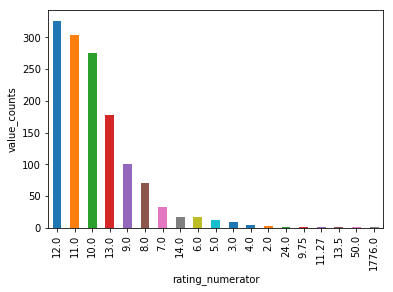

In [1178]:
# univariate bar plot of the rating_numerator vs its valaue_counts
all_data['rating_numerator'].value_counts().plot.bar();
plt.xlabel("rating_numerator");
plt.ylabel("value_counts");

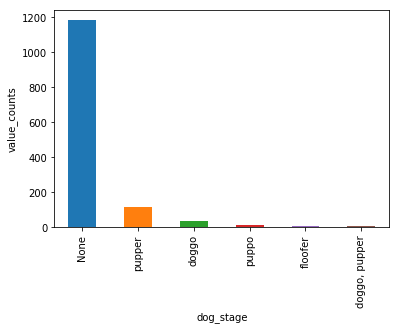

In [1179]:
# univariate bar plot of the dog_stage vs its valaue_counts
all_data['dog_stage'].value_counts().plot.bar();
plt.xlabel("dog_stage");
plt.ylabel("value_counts");

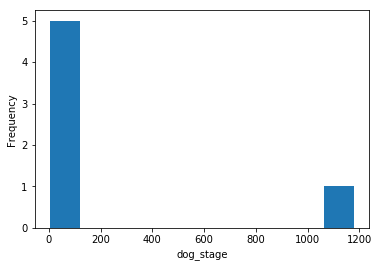

In [1180]:
# univariate histogram plot of dog_stage
all_data['dog_stage'].value_counts().plot.hist();
plt.xlabel("dog_stage");

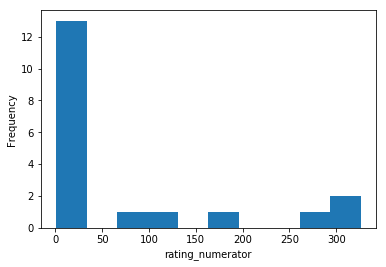

In [1181]:
# univariate histogram plot of rating_numerator
all_data['rating_numerator'].value_counts().plot.hist();
plt.xlabel("rating_numerator");

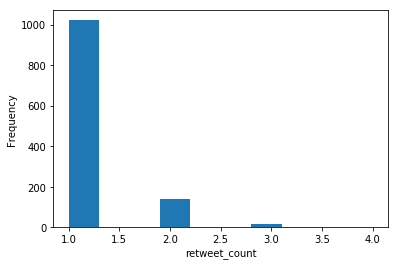

In [1182]:
# univariate histogram plot of retweet_count
all_data['retweet_count'].value_counts().plot.hist();
plt.xlabel("retweet_count");

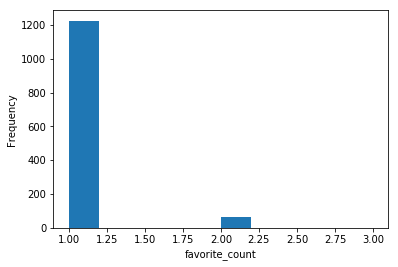

In [1183]:
# univariate histogram plot of favorite_count
all_data['favorite_count'].value_counts().plot.hist();
plt.xlabel("favorite_count");

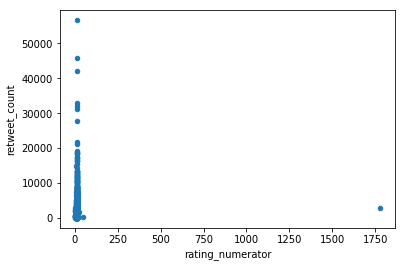

In [1184]:
# bivariate scatter plot of rating_numerator and retweet_count
all_data.plot.scatter(x='rating_numerator', y='retweet_count');

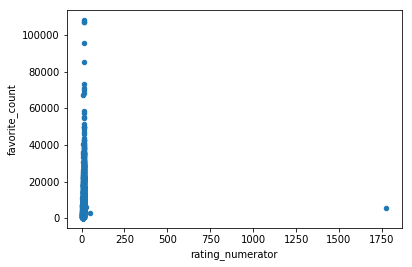

In [1185]:
# bivariate scatter plot of rating_numerator and favorite_count
all_data.plot.scatter(x='rating_numerator', y='favorite_count');

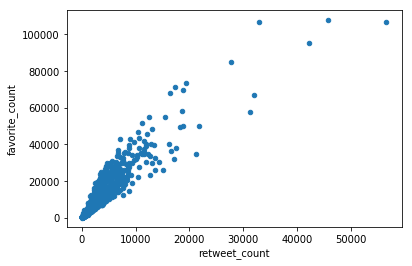

In [1186]:
# bivariate scatter plot of retweet_count and favorite_count
all_data.plot.scatter(x='retweet_count', y='favorite_count');

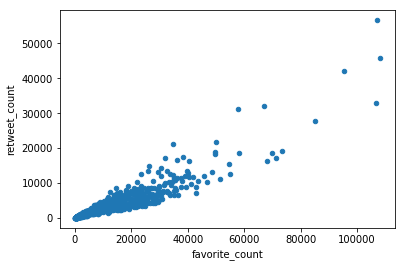

In [1187]:
# bivariate scatter plot of favorite_count and retweet_count
all_data.plot.scatter(x='favorite_count', y='retweet_count');

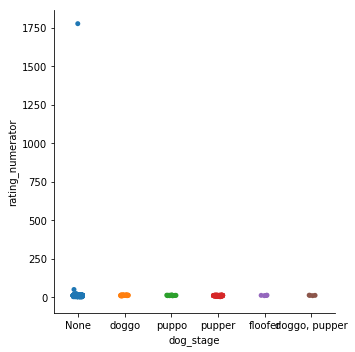

In [1188]:
# bivariate cat plot of dog_stage and rating_numerator
sb.catplot(x="dog_stage", y="rating_numerator", data=all_data);

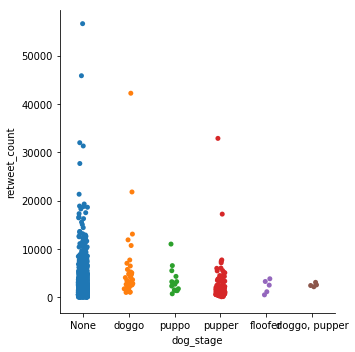

In [1189]:
# bivariate cat plot of dog_stage and retweet_count
sb.catplot(x="dog_stage", y="retweet_count", data=all_data);

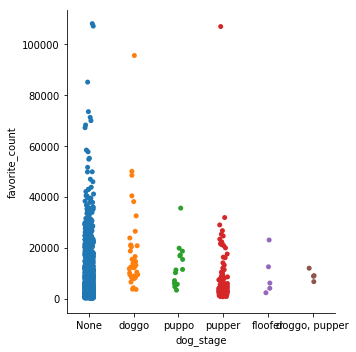

In [1190]:
# bivariate cat plot of dog_stage and favorite_count
sb.catplot(x="dog_stage", y="favorite_count", data=all_data);

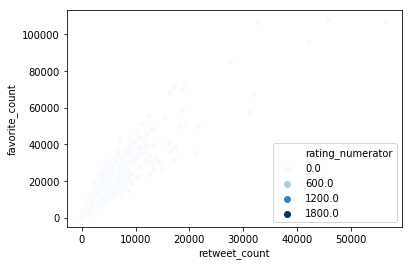

In [1191]:
# multivariate scatter plot of retweet_count by favorite_count, and rating_numerator
sb.scatterplot(data=all_data, x='retweet_count', y='favorite_count', hue="rating_numerator", palette="Blues");

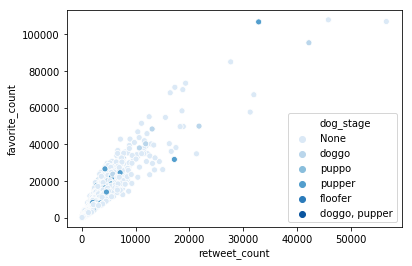

In [1192]:
# multivariate scatter plot of retweet_count by favorite_count, and dog_stage
sb.scatterplot(data=all_data, x='retweet_count', y='favorite_count', hue="dog_stage", palette="Blues");

C:\Users\Ameen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


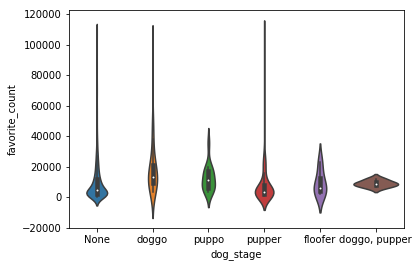

In [1193]:
# multivariate violin plot of dog_stage by favorite_count
sb.violinplot(x=all_data.dog_stage, y=all_data.favorite_count);